# Testing PyCaret

In [12]:
import pandas as pd
from pycaret.clustering import *
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('../udemy/Clustering/iris_dataset.csv')
data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
train, test = train_test_split(data, test_size=0.2)

In [11]:
print(train.shape)
print(test.shape)

(120, 4)
(30, 4)


In [13]:
cluster_test = setup(train, normalize=True,
    session_id=123)

,Description,Value
0,session_id,123
1,Original Data,"(120, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(120, 4)"
9,CPU Jobs,-1


In [18]:
kmeans = create_model('kmeans', num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4762,189.6276,0.7838,0,0,0


In [19]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [21]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [22]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster
90,5.5,2.6,4.4,1.2,Cluster 0
97,6.2,2.9,4.3,1.3,Cluster 0
91,6.1,3.0,4.6,1.4,Cluster 0
145,6.7,3.0,5.2,2.3,Cluster 2
106,4.9,2.5,4.5,1.7,Cluster 0


In [23]:
plot_model(kmeans)

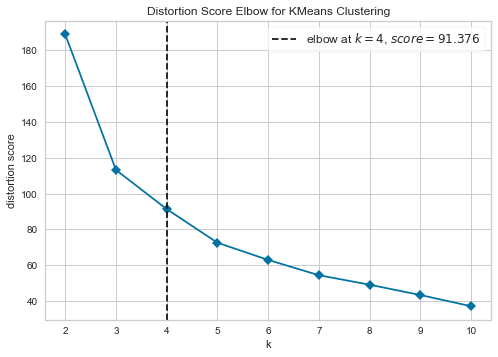

In [24]:
plot_model(kmeans, plot='elbow')

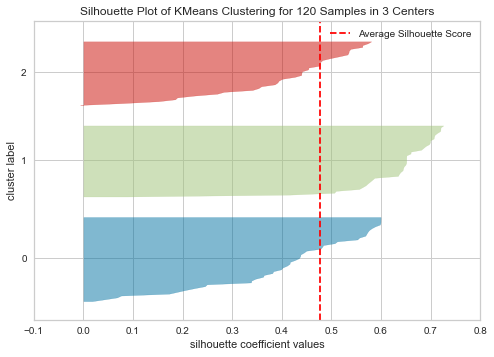

In [25]:
plot_model(kmeans, plot='silhouette')

In [26]:
unseen_predictions = predict_model(kmeans, data=test)
unseen_predictions.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster
105,7.6,3.0,6.6,2.1,Cluster 2
18,5.7,3.8,1.7,0.3,Cluster 1
146,6.3,2.5,5.0,1.9,Cluster 0
75,6.6,3.0,4.4,1.4,Cluster 2
52,6.9,3.1,4.9,1.5,Cluster 2
